# Weather in Szeged 

by Subhankar Halder 

## Objective

In this project, we predict apparent temperature using the weather dataset in Szeged. In particular, we use the Linear Regression Model to train the data, find relationships and make predictions. [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/downloads/szeged-weather.zip/1#weatherHistory.csv) is the source of this data set. The data set includes historical weather data for Szeged from the year 2006 to 2016. 


## Background

Szeged is one of the largest cities in Hungary. It is situated in the southern part of the country and borders Serbia. According to [Wikipedia](https://en.wikipedia.org/wiki/Szeged#Climate), the city experiences cold winters and hot summers with low precipitation. 

Weather is the characteristic of the atmosphere of a place for a period of time. Various meteorological variables (temperature, humidity, etc) are considered to be elements of the weather. As noted in this [website](https://nsidc.org/cryosphere/arctic-meteorology/factors_affecting_climate_weather.html), these individual variables interact with each other to form various weather patterns and climate feedback. 

## Import Libraries

We import libraries into Python that will supply us with tools to sort, organize, visualize and analyze data. 


In [125]:
# Import numpy and set alias as np
import numpy as np

# Import pandas and set alias as pd
import pandas as pd

# Import pyplot and set alias as plt
from matplotlib import pyplot as plt

# Import seaborn and set alias as sns
import seaborn as sns

# Import Linear Regression module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Import module to split data for Regression
from sklearn.model_selection import train_test_split



## Load Data

We load the csv file and convert the data into a pandas data frame. We print the first few rows to get a "feel" about the data. 

In [126]:
# Load Data into data frame
df = pd.read_csv('weatherHistory.csv')

# Use head command to print first 5 rows
print(df.head(5))

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

## Data Exploration

In this section, we explore the weather data in some detail. However, before we start, our first goal is to clean the data. We look for empty cells, abdurd data and errors in our data frame and fix those issues. Once we are sure that our data is clean, we would use statistics, visual aids and tables to understand the various meteorological elements in our data frame.    

In [127]:
# Print information about the data frame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


#### Data Cleaning

While we understand the meaning of most of the columns in the data frame, (a) 'Apparent Temperature' and (b) 'Loud Cover' columns are new to us. A quick search on the web reveals that 'Apparent Temperature' is the perceived termperature and depends on air temperature, humidity and wind speed. Moreover, the column 'Loud Cover' is a mistake and probably means 'Cloud Cover'. We correct the spelling mistake. 

Cloud cover is measured in the unit of 'okta' where 0 okta refers to clear skies and 8 oktas refers to completely overcast skies. The snapshot of the data frame shows that while the data for the 0th row and the 'Summary' column is 'Partly Cloudy' and 'Partly cloudy throughout the day.' for the 'Daily Summary'column, the data for the 'Loud Cover' column is 0. Thus, clearly data in either 'Loud Cover' or 'Summary and 'Daily Summary' are wrong. Since the first five rows for the 'Loud Cover' column is 0, we also check if data is corrupted for all the cells under the 'Loud Cover' column. If we find the column to be corrupted, we would not take the column into account in our data analysis.    

In [128]:
# Rename Column Loud Cover to Cloud Cover

df.rename(columns = {'Loud Cover': 'Cloud Cover'}, inplace = True)

# Check Column name change
df.info()

# Write code to check if all values in Cloud Cover column are 0
for i in df['Cloud Cover']:
    c = 0
    if i != 0:
        c += 0
if c == 0:
    print('Cloud Cover column has all values 0')
else:
    print('Cloud Cover column has some non-zero data in its column')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Cloud Cover                 96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
Cloud Cover column has all values 0


In [129]:
#Drop the Cloud Cover column since the column data is 0. The column is  corrupted. 
df.drop('Cloud Cover', axis=1, inplace = True)

#Explore Data Frame to check if the Column has been eliminated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(7), object(4)
memory usage: 8.1+ MB


### Data Cleaning

With the 'Cloud Cover' issue sorted out, we explore other data columns for corruption. Proceeding in this direction, we check whether the quantitative columns have data that are allowed when its units are taken into consideration.

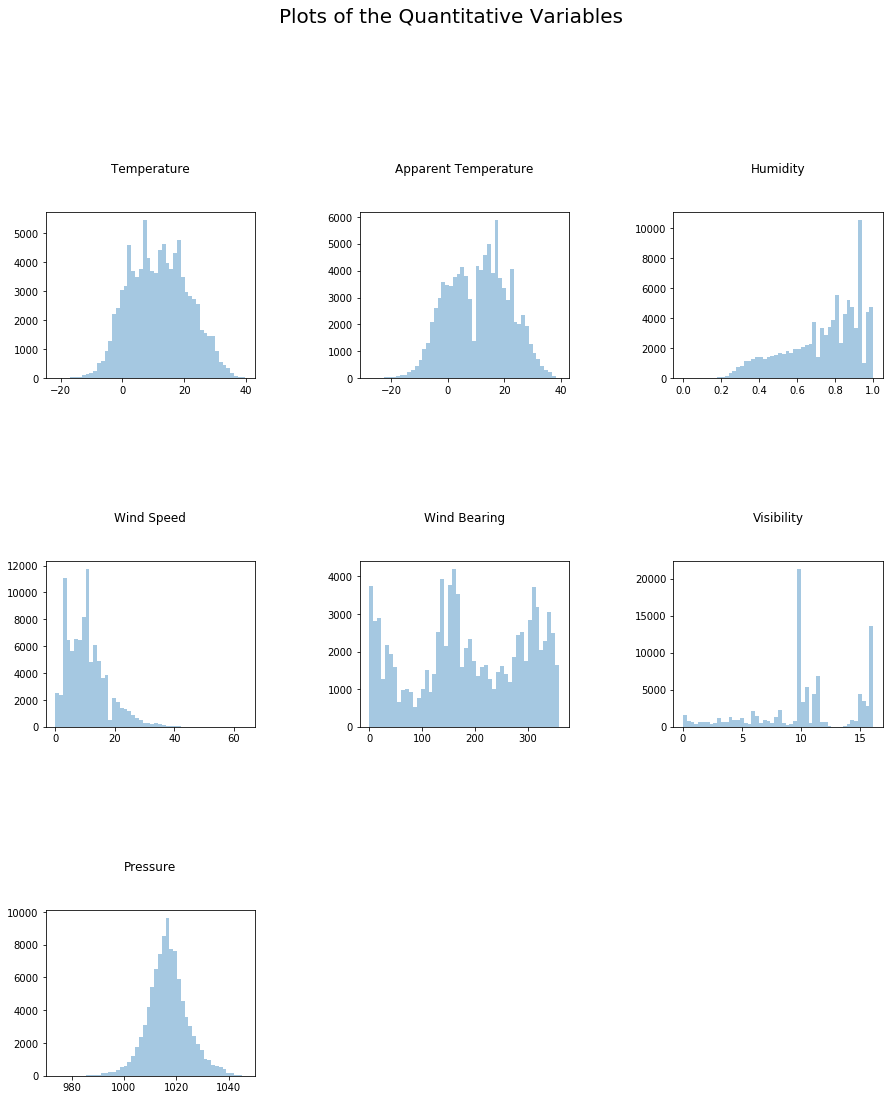

In [138]:
# Make plots of all the seven quantitative variables in the data set
# This would have 3 columns and 3 rows
# Initiate subplots
fig, ax = plt.subplots(figsize=(15,15), ncols=3, nrows=3)

# Assign values for spacing between graphs
left   =  0.125  
right  =  0.9    
bottom =  0.1    
top    =  0.9    
wspace =  .5     
hspace =  1.1    

# This function adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.2

plt.suptitle("Plots of the Quantitative Variables", y = 1.09, fontsize=20)

# Name y-axis titles and feed in the data for row 0
ax[0][0].set_title('Temperature', y = y_title_margin)
ax[0][1].set_title('Apparent Temperature', y = y_title_margin)
ax[0][2].set_title('Humidity', y = y_title_margin)

sns.distplot(df['Temperature (C)'], kde = False, ax=ax[0][0])
sns.distplot(df['Apparent Temperature (C)'],kde = False, ax=ax[0][1])
sns.distplot(df['Humidity'],kde = False, ax=ax[0][2])



# Name y-axis titles and feed in the data for row 1
ax[1][0].set_title('Wind Speed',  y = y_title_margin)
ax[1][1].set_title('Wind Bearing',  y = y_title_margin)
ax[1][2].set_title('Visibility', y=y_title_margin)

sns.distplot(df['Wind Speed (km/h)'],  kde = False, ax=ax[1][0])
sns.distplot(df['Wind Bearing (degrees)'], kde = False, ax=ax[1][1])
sns.distplot(df['Visibility (km)'],kde = False, ax=ax[1][2])



# Name y-axis titles and feed in the data for row 2

ax[2][0].set_title('Pressure',   y = y_title_margin)

sns.distplot(df['Pressure (millibars)'], kde = False, ax=ax[2][0])

#Remove last 2 empty plots
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])

# Remove labels.

for i in range(3):
    for j in range(3):
     ax[i][j].set_ylabel('')    
     ax[i][j].set_xlabel('')

### Observations

We note that the data for all the variables except Pressure look good. For the Pressure variable, we note that there are instances where there is 0 millibar for some observations. This is absurd as sea level atmospheric pressure is roughly 1013 millibars. We investigate this issue. 

In [131]:
# Extract rows that have 0 millibars pressure
zero_millibar = df[df['Pressure (millibars)'] == 0]

#Look at a snapshot of the data
zero_millibar.head(5)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
858,2006-08-14 18:00:00.000 +0200,Partly Cloudy,rain,22.477778,22.477778,0.58,10.8192,159.0,11.1251,0.0,Mostly cloudy until night.
874,2006-08-15 10:00:00.000 +0200,Partly Cloudy,rain,21.061111,21.061111,0.73,7.7924,264.0,11.2056,0.0,Partly cloudy until evening.
924,2006-08-17 12:00:00.000 +0200,Clear,rain,28.838889,29.611111,0.51,9.6600,177.0,9.9820,0.0,Partly cloudy until morning.
945,2006-08-18 09:00:00.000 +0200,Clear,rain,24.950000,24.950000,0.69,16.0195,180.0,9.9015,0.0,Partly cloudy starting overnight continuing un...
1074,2006-08-22 18:00:00.000 +0200,Partly Cloudy,rain,23.811111,23.811111,0.45,16.0195,290.0,11.2056,0.0,Partly cloudy starting in the morning.


Text(0.5, 0, '')

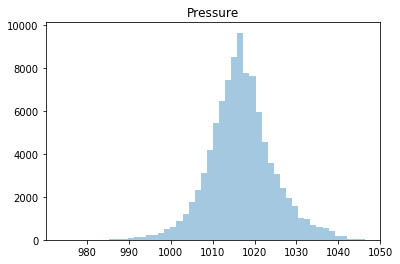

In [132]:
# We decide to replace the 0 with the median of the points that have nonzero pressure

# Extract rows that have non-zero millibars pressure
non_zero_millibar = df[df['Pressure (millibars)'] != 0]

#Find mean of the pressure column un non_zero_millibar
median_pressure = non_zero_millibar['Pressure (millibars)'].median()

#Create function to replace 0 pressure with the median value
def change_pressure(x):
    if x == 0:
        x = median_pressure
        return x
    else:
        return x
        
# Make the changes in the pressure column of the dataframe  
df['Pressure (millibars)'] = df.apply(lambda row: change_pressure(row['Pressure (millibars)']), axis=1) 

# Check a histogram of Pressure

ax = plt.subplot()

# Name y-axis titles and feed in the data 
ax.set_title('Pressure')


sns.distplot(df['Pressure (millibars)'], kde = False)


# Remove labels.

ax.set_ylabel('')    
ax.set_xlabel('')


## Regression

During the study of the dataset, we realized that according to [theory](https://en.wikipedia.org/wiki/Apparent_temperature), apparent temperature depends on temperature, humidity and wind speed. We note that we have additional variables of wind bearing angle, pressure and visibility in our data set. We  use all of these variables to predict apparent temperature.   

### Preparing Data for Regression

To begin regression, we prepare the data by splitting our data set into two parts:(a) Training Dataset and (b) Testing Dataset

In [133]:
# We splite the data set into training and test data. 
#We select 80% of the data to be training and keep the rest 20% for testing

train, test = train_test_split(df, test_size=0.2)

# Reset Index for each of the data frames
train.reset_index(drop=True, inplace = True)
test.reset_index(drop=True, inplace = True)

# Check Results
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77162 entries, 0 to 77161
Data columns (total 11 columns):
Formatted Date              77162 non-null object
Summary                     77162 non-null object
Precip Type                 76759 non-null object
Temperature (C)             77162 non-null float64
Apparent Temperature (C)    77162 non-null float64
Humidity                    77162 non-null float64
Wind Speed (km/h)           77162 non-null float64
Wind Bearing (degrees)      77162 non-null float64
Visibility (km)             77162 non-null float64
Pressure (millibars)        77162 non-null float64
Daily Summary               77162 non-null object
dtypes: float64(7), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19291 entries, 0 to 19290
Data columns (total 11 columns):
Formatted Date              19291 non-null object
Summary                     19291 non-null object
Precip Type                 19177 non-null object
Temperature (C)        

### Regression 1:

We conjecture that apparent temperature follows a linear relationship with temperature, humidity and wind speed. We employ a multiple linear regression to train our model. 

The coefficient for Temperature (C) is 1.1259319142664186
The coefficient for Humidity is 1.0379804949611249
The coefficient for Wind Speed (km/h) is -0.09527141668980993
The intercept for our model is -2.3129632237941387
The goodness of fit score is 0.9898898519304182


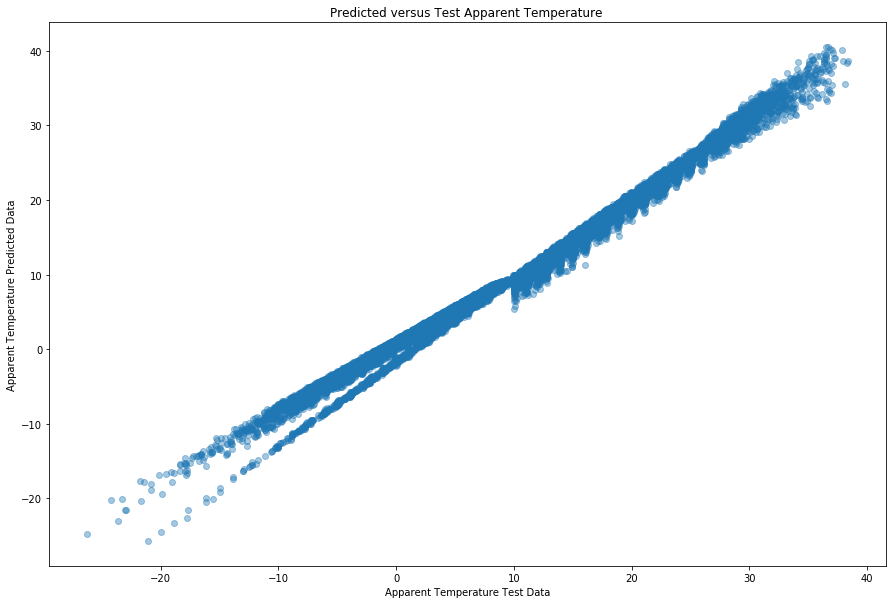

In [134]:
# Prepare the training data

X_train = train[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
y_train = train[['Apparent Temperature (C)']] 

# Prepare the test data
X_test = test[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
y_test = test[['Apparent Temperature (C)']] 

# Train the Linear Regression Model
reg_1 = LinearRegression()  
reg_1.fit(X_train, y_train)

# Print coefficients and slope of the model
for i, col in enumerate(X_train.columns):
   print("The coefficient for {} is {}".format(col, reg_1.coef_[0][i]))

intercept = reg_1.intercept_[0]
print("The intercept for our model is {}".format(intercept))

# Print out the goodness of fit value
print('The goodness of fit score is {}'.format(reg_1.score(X_test, y_test)))

# Make prediction using the model
y_predict_array = reg_1.predict(X_test)

# Convert predicted data into dataframe and rename column
y_predict = pd.DataFrame(y_predict_array)
y_predict.columns = ['Apparent Temperature Prediction']

# Make a scatterplot of test and predicted apparent temperature values
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel('Apparent Temperature Test Data')
plt.ylabel('Apparent Temperature Predicted Data')
plt.title('Predicted versus Test Apparent Temperature ')
plt.show()



### Observations

Based on the output we can say that our model predicts the apparent temperature extremely well. The goodness of fit parameter is 98.9% meaning that 98.9% of the variability is explained by the model. In our scatter plot, the predicted apparent temperature fits in closely with the test data along the $y=x$ line. We note that wind speed has the least impact on apparent temperature while humidity and temperature had the most. One could perhaps, drop the wind speed as a factor in the linear model. 

### Regression 2:

This time we conjecture that  apparent temperature follows a linear relationship with all the other 6 variables: temperature, humidity, wind speed, wind angle, visibility and pressure. Just like our previous model, we will employ a linear regression model. 

The coefficient for Temperature (C) is 1.1316663332037382
The coefficient for Humidity is 1.2321664164944226
The coefficient for Wind Speed (km/h) is -0.09104711006757939
The coefficient for Wind Bearing (degrees) is 0.000563345358184808
The coefficient for Visibility (km) is 0.0007891385644072657
The coefficient for Pressure (millibars) is 0.014295573015550955
The intercept for our model is -2.3129632237941387
The goodness of fit score is 0.989979411078679


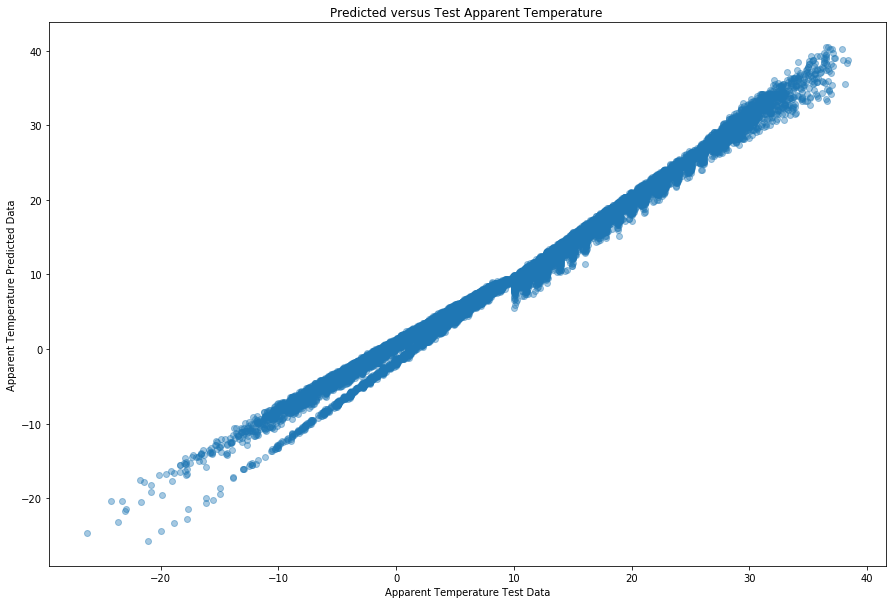

In [135]:
# Prepare the training data

X_train = train[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y_train = train[['Apparent Temperature (C)']] 

# Prepare the test data
X_test = test[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
y_test = test[['Apparent Temperature (C)']] 

# Train the Linear Regression Model
reg_2 = LinearRegression()  
reg_2.fit(X_train, y_train)

# Print coefficients and slope of the model
for i, col in enumerate(X_train.columns):
   print("The coefficient for {} is {}".format(col, reg_2.coef_[0][i]))

intercept = reg_1.intercept_[0]
print("The intercept for our model is {}".format(intercept))

# Print out the goodness of fit value
print('The goodness of fit score is {}'.format(reg_2.score(X_test, y_test)))

# Make prediction using the model
y_predict_array = reg_2.predict(X_test)

# Convert predicted data into dataframe and rename column
y_predict = pd.DataFrame(y_predict_array)
y_predict.columns = ['Apparent Temperature Prediction']

# Make a scatterplot of test and predicted apparent temperature values
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel('Apparent Temperature Test Data')
plt.ylabel('Apparent Temperature Predicted Data')
plt.title('Predicted versus Test Apparent Temperature ')
plt.show()


### Observations

Even in this model, we have a very good regression line fit as noted by the fit value and the scatter plot. We note that humiditity and pressures still impact the apparent temperature the most.   


## Summary

* Both our regression models, humidity and temperature had the most impact on apparent temperature.
* Both our regression models achieved excellent goodness of fit values. This may be because apparent temperature is a calculated value and not an observed value. It is known that apparent temperature is calculated by taking into account temperature, humidity and wind factor. 
* There could be many improvements to our models. As noted earlier, we could base our model only on humidity and temperature. We could test for multicollinearity and heteroskedasticity to check how error prone our model is. 